# COGS 108 Final Project

## Overview

Oftentimes parks or recreational facilities are distributed in common areas for communities to reach them. However, it is possible that certain communities receive less attention or vice versa receive too much attention from the Department of Parks and Recreation in San Diego. By the end of this analysis, I will be looking at the connection, if any, between the location of joint use parks specifically and the amount of joint use parks in those communities. Joint use parks are important to look at specifically because often it can indicate biases the city is having towards communities based on a number of factors. That is why I would like to look at the number of joint parks and if their distribution can be one of many indications of there either be a bias or not towards communities depending on their income or population characteristics. Through mapping data concerning location and amount with other factors like year of construction for joint use parks, the city of San Diego can proceed with my recommendation on the placement of joint use parks. At the end of the report, we can see that there is no visible correlation between the location of joint use parks and the amount of them in a certain community, but were able to see a trend in the years in which joint use parks were constructed and implications that there has been a bit of a die off that I would recommend reigniting. 

For this report, 'JUP' in the graphs will stand for 'joint use parks.'



## Name & GitHub

Name: April Cano
GitHub Username: aprilcano

## Research Question

Is there a relationship between the amount of joint use parks and the community they are located in? Should I advise the city of San Diego to start looking at the locations of joint use parks and allocate them fairly or where needed if indicated by the years?

## Background and Prior Work

https://www.sandiegouniontribune.com/news/politics/sd-me-parks-schools-20170323-story.html
https://www.sandiego.gov/sites/default/files/playalldaybrochure.pdf
https://www.sandiegobusiness.org/sites/default/files/Regional%20Poverty%20in%20the%20San%20Diego%20Region.pdf

Before going into the analysis of the data, I wanted some background into the process of determining where to construct a joint use park. Looking at articles it looks like since joint use parks are agreements between a city and a school, often the allocation of these parks depends on the space left around schools and how much financial need school needs or how much the city is willing to spend and invest in. While doing research before going into the analysis, I found that there are currently 76 joint use parks in San Diego as of 2017 plus some more in other school districts that San Diego is involved in more recent years. I was also able to see that the funds that go behind the construction and maintenance for joint use parks have come mainly from Prop S and Z. There is also a program that helps keep the construction and funding for joint use parks which promotes parks to be more inclusive and lean away from inequities called the ‘Play All Day” parks program. I also did extra research to find the average income of the communities in San Diego to use for reference at the end when seeing if there is a certain pattern in the placement of joint use parks and a possible bias. The list of communities is limited and does not include all communities found in the dataset I used for this report and is a limitation to the report and he possible interpretation at the end. The list of cities is as follows: 
[National City, El Cajon, Imperial Beach, Vista, Escondido, Lemon Grove, La Mesa, San Marcos, Oceanside, San Diego, Chula Vista, Santee, Carslbad, Coronado, Solana Beach, Encinitas, Poway, Del Mar].

A lot of these communitites are close by each other and can include some communtities involved in the dataset, but since the majority could not be accounted for the analysis at the end was limited and more centered towards if there seemed to be a buildup of joint use parks in one community without a real reason that I could uncover for as why. 


## Hypothesis

I think that there will not be a relationship between the amount of joint use parks and the location of those parks because joint use parks look like they are more aware of the differences certain commnuntities face compared to others. Also, since they are covered by certain programs and the city does not lose too much of their financial gains it would seem that number of joint use parks are not related to their location in San Diego. 

## Datasets

I used one dataset which is https://github.com/COGS108/individual_fa20/blob/master/data/joint_use_datasd.geojson concerning the data of joint use parks. 

I used this data because it had all the information I needed from the amount of joint use parks in San Diego with the communties they are located in within San Diego. Originally, the dataset had 96 rows and 29 columns. After the cleaning, the dataset only had 3 rows and 96 columns. 

Ideally, I would of also wanted to find a dataset with a set of incomes for all the communties in San Diego as that could have helped find a correlation or could end up showing that being a different factor that affects the positioning of joint use parks. 

## Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import geopandas as gpd

import patsy
import statsmodels.api as sm

from scipy.stats import skewnorm
import requests
import io

import datetime

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

### Loading Dataset

In [2]:
df_jointusep = gpd.read_file('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/joint_use_datasd.geojson')


### Dropping Columns

In [3]:
#drop columns that are not needed for my report, could result in limitation of analysis
df_jointusep = df_jointusep.drop(columns = ['name', 'facility', 'school_dis', 'city_acres', 'dist_acres', 'enhanced',
                            'term_yrs', 'exp_date', 'address', 'notes', 'council_di', 'serv_dist', 'playground', 'tot_lot',
                            'playg_inst', 'baseb_50_6', 'baseb_90', 'softball', 'multi_purp', 'basketball', 'tennis_ct', 
                             'sand_vball', 'field_ligh', 'comfort_st', 'concess_st', 'geometry'])

In [4]:
#checking for missing data in rows
df_jointusep = df_jointusep[df_jointusep['community'].notna()]
df_jointusep = df_jointusep[df_jointusep['strt_date'].notna()]

df_jointusep.head()

,objectid,strt_date,community
0,2087,1990-07-23,MID-CITY: NORMAL HEIGHTS
1,2088,2006-09-19,CLAIREMONT MESA
2,2089,2000-10-16,PACIFIC BEACH
3,2090,2005-05-03,LA JOLLA
4,2091,1990-06-11,Rancho Peñasquitos


In [5]:
#created a new column with only the year of the 'strt_date' column as I would only
#go to use the year for my report
df_jointusep['year'] = pd.DatetimeIndex(df_jointusep['strt_date']).year
df_jointusep = df_jointusep.drop(columns = ['strt_date'])

In [7]:
#created another column into dataframe of the count of the parks in the communities
#to give a comparison over which communities have more or less joint use parks 
df_jointusep['count_community'] = df_jointusep['community'].map(df_jointusep['community'].value_counts())

## Data Analysis and Results

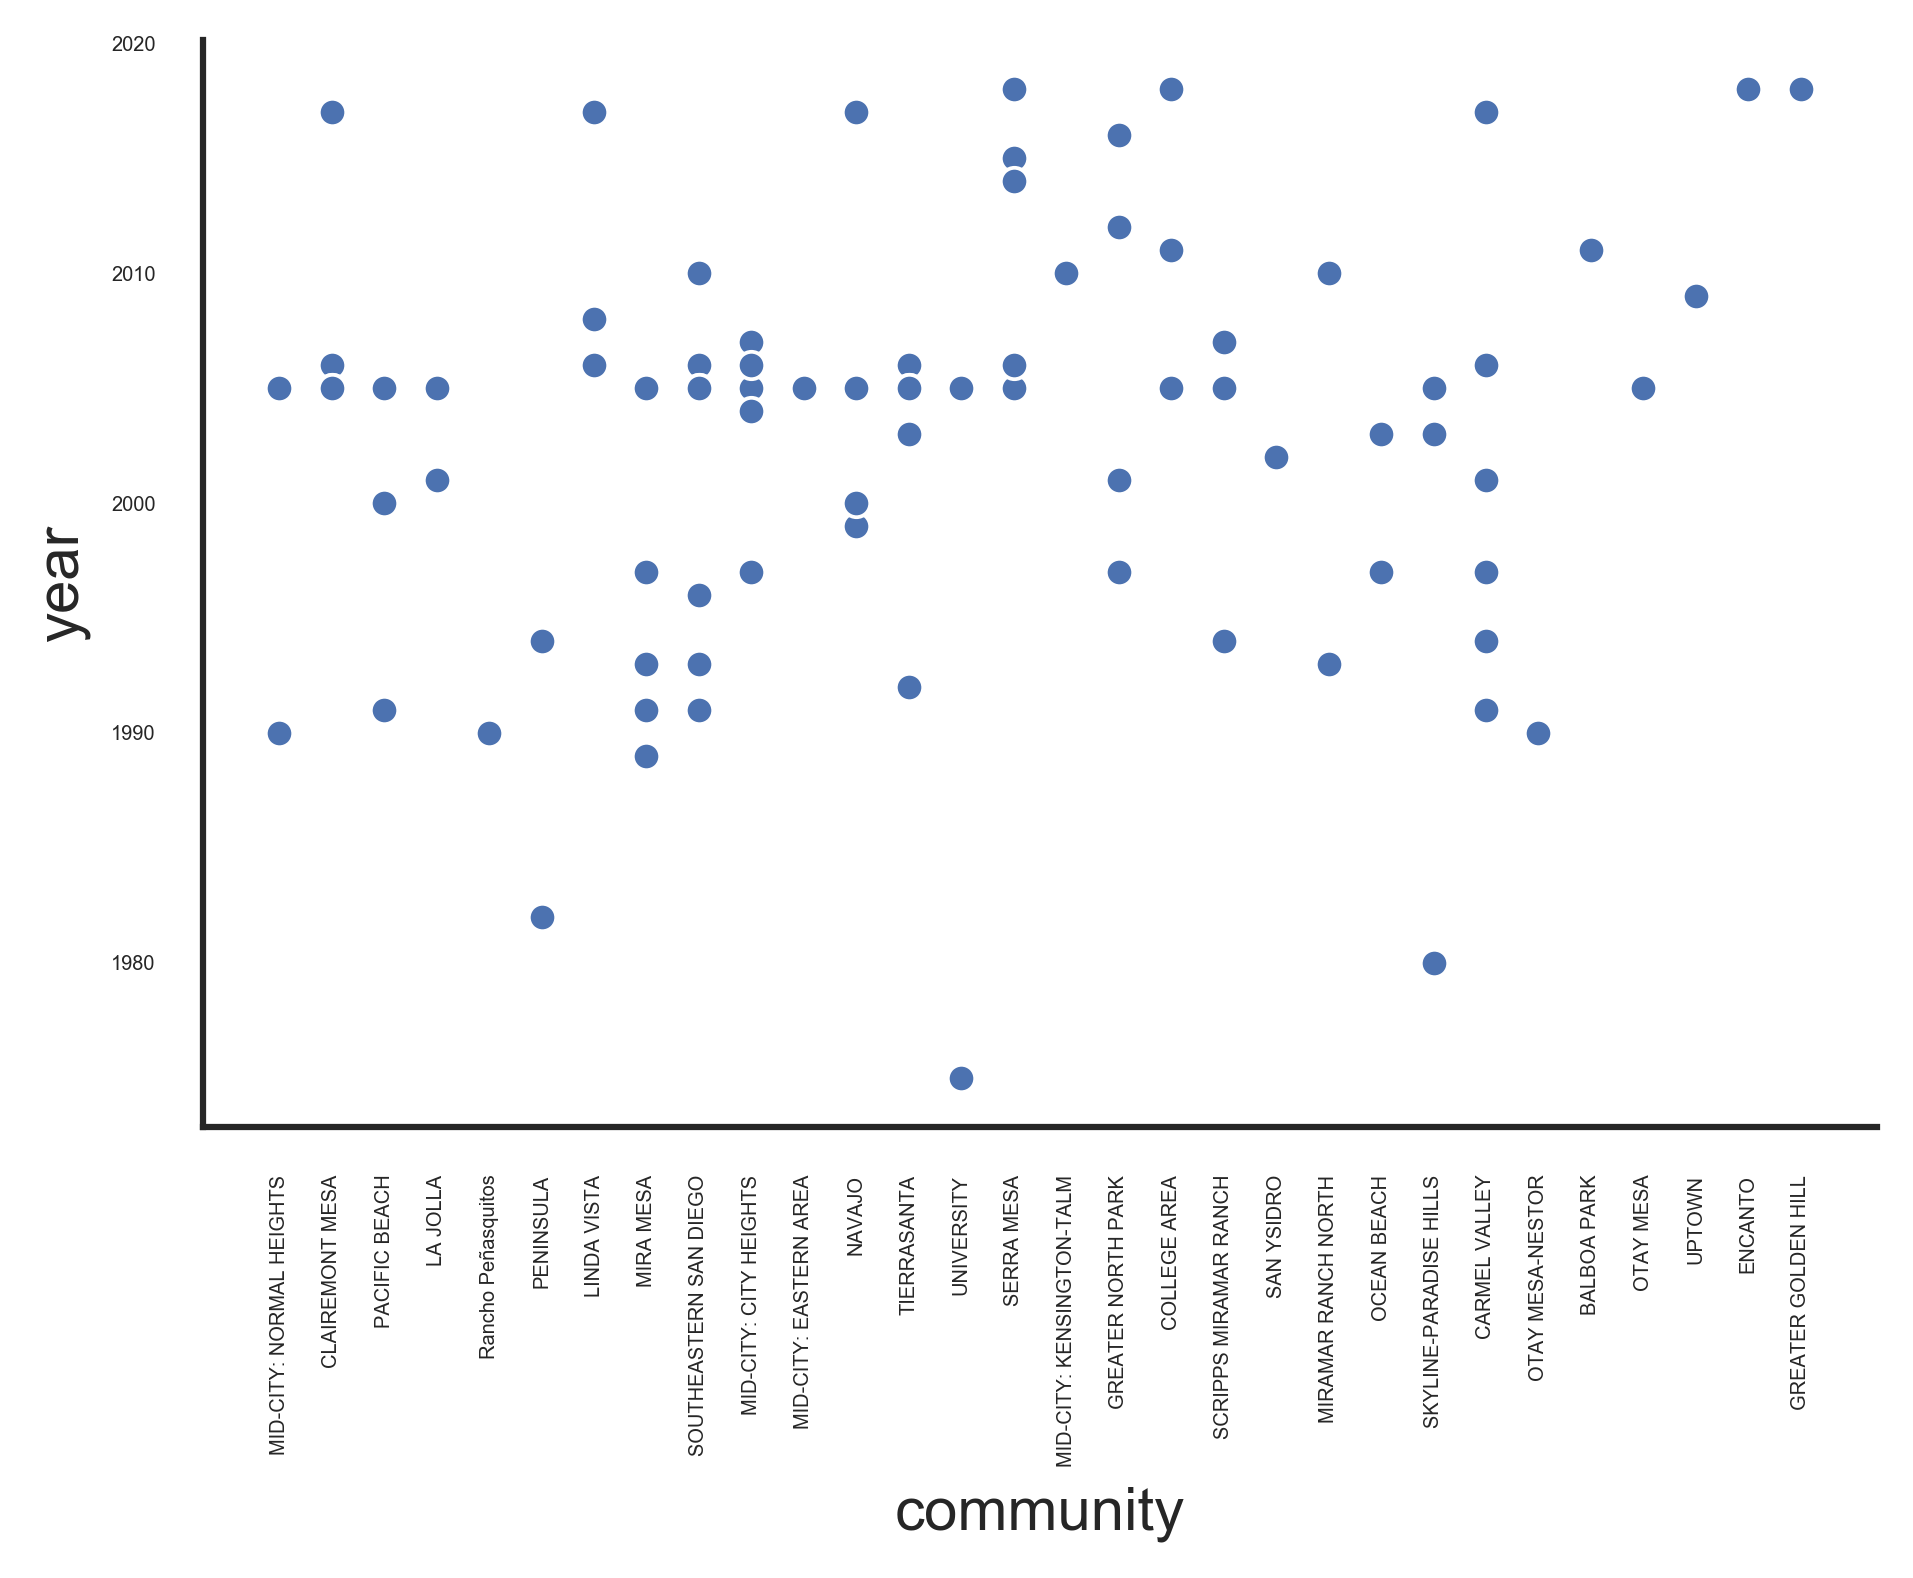

In [25]:
#Created a scatter plot to capture the relation of the amount of joint use parks
#and when they were started or constructed.
#Helps give visual as to when joint use parks became more popular
#and helps decide if I should advise for more or less in
sns.set(style = 'white')
df_jointusep['year'].value_counts()
sns.scatterplot(x = 'community', y = 'year', data = df_jointusep, s = 30)
plt.xticks(rotation = 'vertical', size = 4)
plt.yticks(size = 4)
sns.despine()

In [17]:
#Graph to depict which communities have the most joint use parks
plt.rcParams['figure.dpi'] = 360
sns.set(style = 'whitegrid')
community_count = df_jointusep['community'].value_counts()
plt.figure(figsize = (50,30))
sns.barplot(community_count.index, community_count.values, alpha = 0.5, palette = 'Greens_r')
plt.title = ('Location of Joint Use Parks in San Diego')
plt.ylabel('Amount of JUP in Given Community', fontsize = 30)
plt.xlabel('Community', fontsize = 30)
plt.xticks(rotation = 'vertical', size = 25)
plt.yticks(size = 25)
sns.despine();
plt.show()

In [26]:
#checks to see if there is a linear regression between the amount of parks and the communities.
outcome, predictors = patsy.dmatrices('count_community ~ community', df_jointusep)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        count_community   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.456e+29
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:55:16   Log-Likelihood:                 3000.2
No. Observations:                  96   AIC:                            -5940.
Df Residuals:                      66   BIC:                            -5864.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [27]:
#checks to see if there is a linear regression between the years the parks were built and the communities.
outcome, predictors = patsy.dmatrices('year ~ community', df_jointusep)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     2.275
Date:                Tue, 15 Dec 2020   Prob (F-statistic):            0.00304
Time:                        18:55:19   Log-Likelihood:                -315.21
No. Observations:                  96   AIC:                             690.4
Df Residuals:                      66   BIC:                             767.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

## Ethics & Privacy

My project has more ethical limitations than privacy ones. The only data that could be shared would be the joint use park id, but since this is already a public estblishment, the sharing of their data is not a concern to this research.

However, there are ethical considerations in this research. This research was only conducted in San Diego counties, and therefore cannot be further generalized to how all cities' Parks and Recreations Department handle the placement of joint use parks and whether there are present biases. This was an ethical concern from the beginning because I was concerned with the biases assoaciated with this region in terms of their political agenda. Another ethical limitation I was concerned with was also dealing with politics but how San Diego has a prop pass to help fund these joint use  parks, while other cities across the nation might not be in the same position. Another concern with the ethics of this research was that there was a lot of data concerned with certain characteristics joint use parks have, but I ommitted it to have a just enough to answer my question. Those other pieces of missing data could indicate a correlation better or have essential parts to seeing a correlation, if any. 

## Conclusion & Discussion

I am able to retain my null hypothesis because there is in fact no real effect from the community on the amount of joint use parks built.

From the results in the scatterplots and the bar graph, we can see that there seems to be little to no correlation involving the communities and the amount of joint use parks there are in those certain communties.
While there is a higher concentration of joint use parks in a couple communitites which suggests we should start dispering their locations more, I cannot conclude that the decison as to where to construct joint use parks seem to be effected by the chracteristics of communities they are chosen to be in.  There seems to be no direct correlation between the construction of joint use parks and the communtities they are located in, but the year did however indicate there was a certain time when joint use parks were more popular in their construction. Partly this correlation can be explained by the laws in San Diego, going back to their props and programs, and how its aim is to support the construction of joint use parks in areas that need them and can be allocated correctly.

I can advise the city of San Diego's Department of Parks and Recreation to start looking at the communties who are in need of joint use parks and try to stray away from decreasing their construction of joint use parks as there are some communtities with a drastic difference in how many joint use parks are already in that area. 